# Graphs

This chapter will make use of the library networkx. The intent is to take advantage of tooling but not hide the logic.

In [68]:
import networkx as nx
import matplotlib.pyplot as plt
from pprint import pprint

In [69]:
# notebook utilities

plt.rcParams["figure.figsize"] = [2, 2]
def figsize(x, y):
    return plt.figure(figsize=(x, y))

connected_planar_tests = [
    ("planar", nx.is_planar),
    ("connected", nx.is_connected),
]

def assert_graph(G, tests=connected_planar_tests):
    '''used to test in-line in a jupyter notebook'''
    for name, f in tests:
        ok = f(G)
        assert ok, f"Test failed: {name}"

def check_graph(G, tests=connected_planar_tests):
    ''' use for debugging and displaying results'''
    results = {}
    for name, f in tests:
        if f(G):
            results[name] = "✅"
        else:
            results[name] = "❌"
    
    for test, result in results.items():
        print(f"{test}: {result}")
        
    return results

Before we move on to a proof, let's familiarize ourselves with the basics of building a graph and some helpful methods to check if a graph is planar and connected

Graph with 3 nodes and 3 edges
planar: ✅
connected: ✅


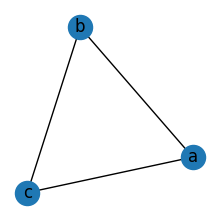

In [70]:
# make a graph G = (V, E)
V = set(['a', 'b', 'c'])
E = set([('a','b'), ('a', 'c'), ('b', 'c')])

G = nx.Graph()
G.add_nodes_from(V)
G.add_edges_from(E)

print(G)
check_graph(G)
nx.draw(G, with_labels=True)

Graph with 4 nodes and 3 edges
planar: ✅
connected: ❌


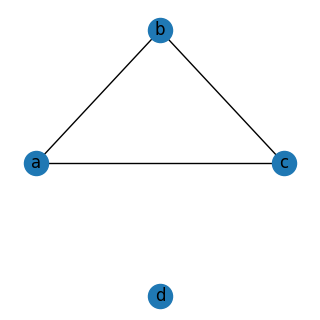

In [73]:
# add an unconnected node

G.add_node('d')

figsize(3,3)
print(G)
check_graph(G)
nx.draw(G, pos=nx.circular_layout(G), with_labels=True)

Graph with 3 nodes and 3 edges
planar: ✅
connected: ✅


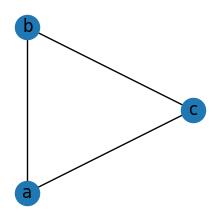

In [74]:
# remove that node

G.remove_node('d')

print(G)
check_graph(G)
nx.draw(G, pos=nx.circular_layout(G), with_labels=True)

Graph with 5 nodes and 10 edges
planar: ❌
connected: ✅


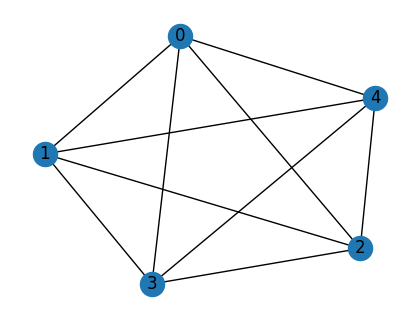

In [75]:
# K5 graph is not planar

G = nx.complete_graph(5)

print(G)
check_graph(G)
figsize(4,3)
nx.draw(G, with_labels=True)

----------

### **Theorem 6.5** 
For any *connected planar* graph G = (V, E) and any drawing of G in the plane $\mathbb{R}^2$ defining a set F of faces, the quantity |V| - |E| + |F| = 2

-------------------

#### *Proof*

We will proceed by induction on the total number of vertices and edges.

The **base** case is trivial. Start with a 1 node 0 edge graph. It is planar and connected. There is only one way embed / draw this graph.

For the **inductive step**, we grow the graph while preserving **connectedness** and **planarity**.  
We will show that the requirements for growing the graph while keeping these conditions preserve the Euler invariant at each iteration.

We can grow the graph while keeping it connected and planar in two ways:

1. **Add an edge between two existing vertices** that lie on the boundary of a common face (so the edge can be drawn inside that face without crossings).
2. **Add a leaf vertex** by adding a new vertex $w$ and a new edge $(w, u)$ to an existing vertex $u$ in $V$.

In the first case, the new edge always increases the $|F|$ by 1, increases $|E|$ by 1 and has no effect on $|V|$:
$$
|V| - (|E| + 1) + (|F| + 1) = |V| + (|F| + 1) - (|E| + 1) = |V| + |F| - |E| = 2
$$
This shows any increase using 1 will hold the identidy.

In a similar fashion for the second case, a new connected leaf vertext will increase $|V|$ by 1, $|E|$ by 1, and have no effect on $|F|$
$$
(|V| + 1) - (|E| + 1) + |F| = |V| - |E| + |F| = 2
$$
This shows any increase using 2 will hold the identity.

This completes the proof.

$\square$

#### Demonstration

In [83]:
# Base -  1 vertex, 0 edge graph (G). |V| - |E| + |F| == 1 - 0 + 1 == 2

G = nx.Graph()
G.add_node('a')

print(G)
assert_graph(G)

Graph with 1 nodes and 0 edges


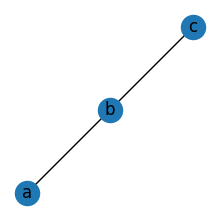

In [84]:
# Inductive step 
# A graph with < 3 vertex has only 1 (the outter) face. The first inductive step adds a leaf vertex and edge. We will do this step twice

# new vertex w
w = 'b'

# new edge (u, w) where u is in V
u = 'a'
assert u in G
G.add_edge(u, w)
assert_graph(G)

# new vertex w
w = 'c'

# new edge (u, w) where u is in V
u = 'b'
assert u in G
G.add_edge(u, w)
assert_graph(G)

nx.draw(G, with_labels=True)

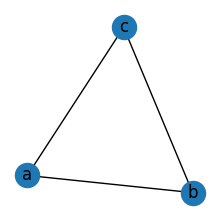

In [85]:
# Inductive step by adding an edge between two existing vertices that lie on the boundary of a common face (so the edge can be drawn inside that face without crossings).

# new edge (a, c)
u = 'a'
v = 'c'
G.add_edge(u, v)

assert_graph(G)
nx.draw(G, with_labels=True)

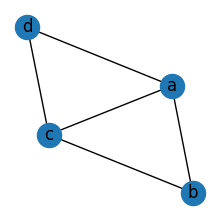

In [86]:
# Continue by adding a leaf then creating a new face

# new vertex w
w = 'd'

# new edge (u, w) where u is in V
u = 'c'
assert u in G
G.add_edge(u, w)
assert_graph(G)

# new edge (a, d)
u = 'a'
v = 'd'
G.add_edge(u, v)
assert_graph(G)

nx.draw(G, with_labels=True)

In [92]:
planar, embedding = nx.check_planarity(G)
print(planar)
print(type(embedding))

True
<class 'networkx.algorithms.planarity.PlanarEmbedding'>


In [96]:
# vars(embedding)

In [94]:
embedding._adj['a']

{'c': {'cw': 'b', 'ccw': 'd'},
 'd': {'cw': 'c', 'ccw': 'b'},
 'b': {'ccw': 'c', 'cw': 'd'}}

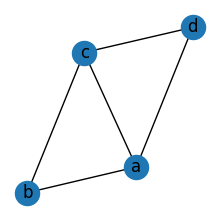

In [95]:
nx.draw(G, with_labels=True)

In [97]:
embedding._adj['b']

{'c': {'ccw': 'a', 'cw': 'a'}, 'a': {'cw': 'c', 'ccw': 'c'}}

In [149]:
G = nx.PlanarEmbedding()

In [159]:
G = nx.PlanarEmbedding()
G.add_half_edge(0, 1)
G.add_half_edge(0, 2, ccw=1)
G.add_half_edge(0, 3, ccw=2)
G.add_half_edge(1, 0)
G.add_half_edge(2, 0)
G.add_half_edge(3, 0)

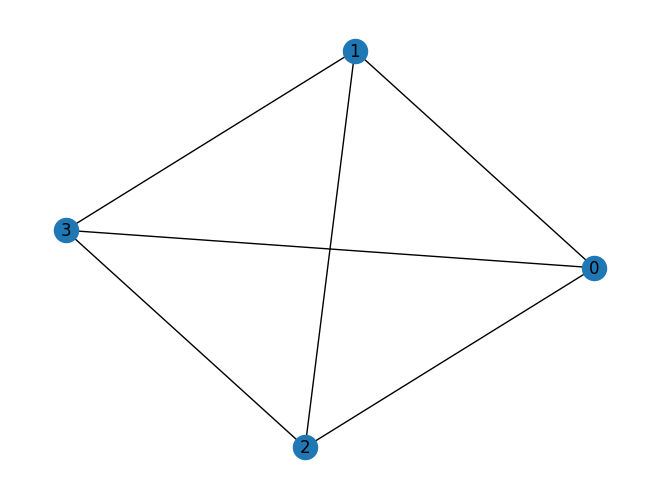

In [64]:
G = nx.complete_graph(4)
nx.draw(G, with_labels=True)

In [68]:
pos = nx.planar_drawing.combinatorial_embedding_to_pos(emb)

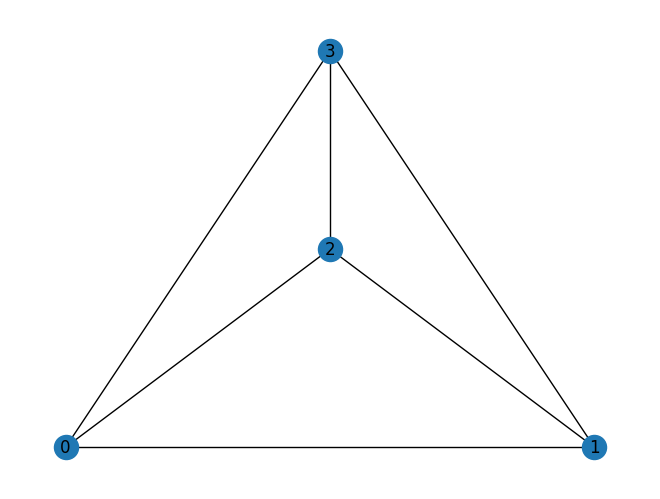

In [69]:
nx.draw(G, pos=pos, with_labels=True)

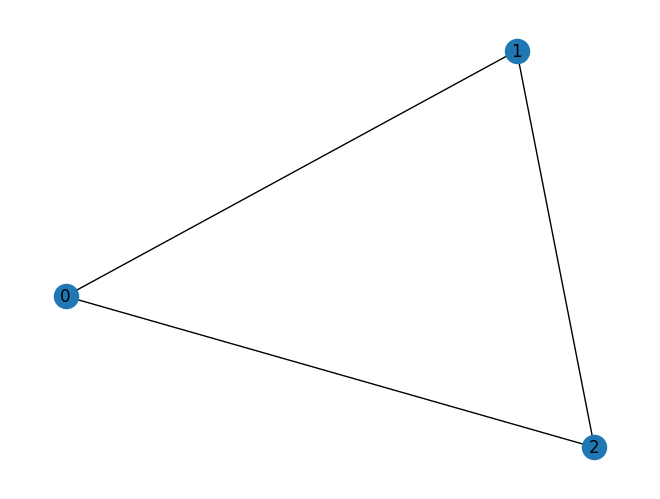

In [78]:
C = nx.cycle_graph(3)
nx.draw(C, with_labels=True)

In [79]:
assert_graph(C)

In [81]:
nx.spring_layout(C)

{0: array([-0.91765799, -0.41056975]),
 1: array([ 0.81439282, -0.58943025]),
 2: array([0.10326516, 1.        ])}